In [1]:
import torch
from torch.utils.data import DataLoader
from data.CK_plus import CK_plus
from data.AffectNet import AffectNetDataset
from torchvision import transforms as tf
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pytorch_grad_cam import GradCAM

/Users/nikolairoehrich/repos/AI_Practical/CVDL_Practical/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.load('/Users/nikolairoehrich/repos/AI_Practical/CVDL_Practical/training/baseline_models/model_20_epochs.pth', map_location=torch.device('cpu'))
model.demo == True 
transforms = tf.Compose([tf.Resize((64,64)),
                         tf.Grayscale(),
                         tf.ToTensor()])
train_dataset = AffectNetDataset(split='test', transform=transforms)
dataloader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True, num_workers=0)
test_batch = next(iter(dataloader))

/var/folders/c7/m1p531b55zl7gnqxg6dnq7_w0000gn/T/ipykernel_41839/718058223.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/Users/nikolairoehrich/rep

In [3]:
output = model.cnn_encoder(test_batch[0])

/Users/nikolairoehrich/repos/AI_Practical/CVDL_Practical/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


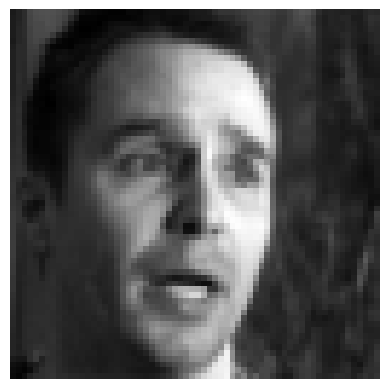

/var/folders/c7/m1p531b55zl7gnqxg6dnq7_w0000gn/T/ipykernel_41839/598356369.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(output[0][i].detach()))


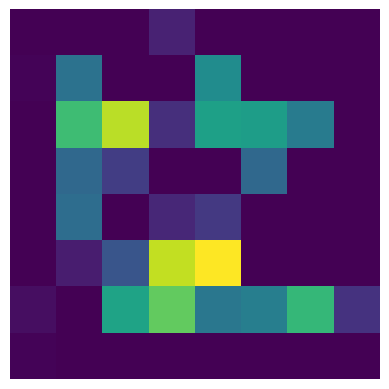

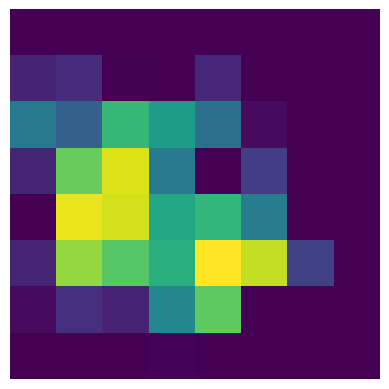

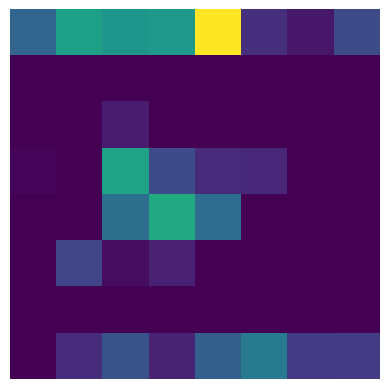

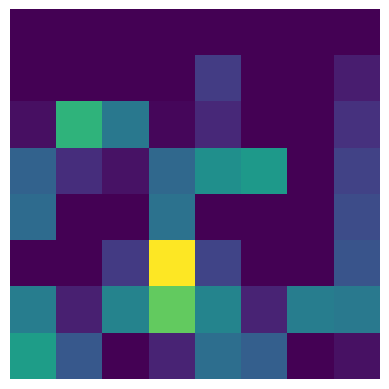

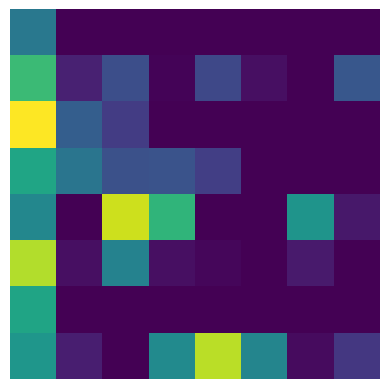

In [ ]:
plt.imshow(test_batch[0][12].squeeze(0).detach().numpy(), cmap = 'gray')
plt.axis("off")
plt.show()
for i in range(5): 
    plt.imshow(np.array(output[0][i].detach()))
    plt.axis("off")
    plt.show()